### Confusion Matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [3]:
# ya = y aktual & yp = y prediksi
ya = [0,0,0,0,0,1,1,1,1,1]
yp = [0,0,0,1,1,0,0,1,1,1]

- | Prediksi 0 | Prediksi 1
- | - | -
__Actual 0__ | 3 | 2
__Actual 1__ | 2 | 3

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ya, yp)
cm

array([[3, 2],
       [2, 3]], dtype=int64)

In [5]:
df = pd.DataFrame(cm, columns=['Prediksi 0', 'Prediksi 1'], index=['Actual 0', 'Actual 1'])
df

,Prediksi 0,Prediksi 1
Actual 0,3,2
Actual 1,2,3


(0, 2)

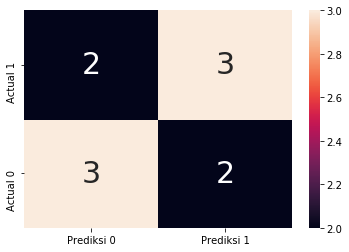

In [6]:
# plot confusion matrix using seaborn
sb.heatmap(df, annot=True, annot_kws={'size': 30})
plt.ylim(0, 2)

In [7]:
x = np.arange(1, 11)
y = np.array([0,0,0,0,1,0,1,0,1,1])

model = LogisticRegression(solver='lbfgs')
model.fit(x.reshape(-1, 1), y)

# prediksi
yp = model.predict(x.reshape(-1, 1))
print(y)
print(yp)

[0 0 0 0 1 0 1 0 1 1]
[0 0 0 0 0 0 1 1 1 1]


- | Prediksi 0 | Prediksi 1
- | - | -
__Aktual 0__ | 5 | 1
__Aktual 1__ | 1 | 3

In [8]:
cm = confusion_matrix(y, yp, labels=[0, 1])
df = pd.DataFrame(cm, columns=['Prediksi 0', 'Prediksi 1'], index=['Aktual 0', 'Aktual 1'])
df

,Prediksi 0,Prediksi 1
Aktual 0,5,1
Aktual 1,1,3


(0, 2)

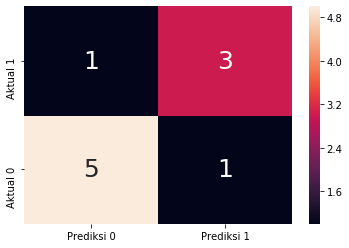

In [9]:
sb.heatmap(df, annot=True, annot_kws={'size': 25})
plt.ylim(0, 2)

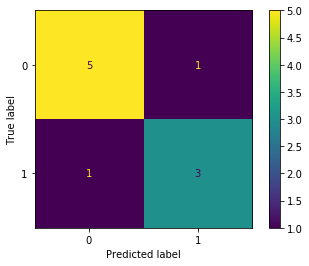

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(
    model, x.reshape(-1, 1), y
)

### Evaluation Metrics from Confusion Matrix

- __True__ : y prediksi == y aktual
- __False__ : y prediksi != y aktual
- __Positive__ : model y prediksi = 1
- __Negative__ : model y prediksi = 0

- __True Positive (TP)__ : y = 1 & yp = 1
- __True Negative (TN)__ : y = 0 & yp = 0
- __False Positive (FP)__ : y = 0 & yp = 1
- __False Negative (FN)__ : y = 1 & yp = 0

In [11]:
df

,Prediksi 0,Prediksi 1
Aktual 0,5,1
Aktual 1,1,3


TP = 3; TN = 5; FP = 1; FN = 1

In [14]:
tn, fp, fn, tp = confusion_matrix(y, yp).ravel()
(tn, fp, fn, tp)

(5, 1, 1, 3)

1. __Accuracy:__ Seberapa sering model kita memprediksi / mengklasifikasi dengan benar

    (tp + tn) / total_data = (3 + 5) / 10 = 0..8 = 80%

2. __Inaccuracy / Error Rate / Missclasification Rate__
    
    Seberapa sering model kita memprediksi / mengklasifikasi dengan salah
    
    (fp + fn) / total_data = (1 + 1) / 10 = 0.2 = 20%
    
    1 - Accuracy = 1 - 0.8 = 0.2 = 20%

3. __TP Rate / Sensitivity / Recall (positif):__
    
    Kalau ya = 1, seberapa sering model memprediksi yp = 1 
    
    tp / total_actual_1 = 3 / 4 = 0.75 = 75%

4. __FP Rate:__ Kalau ya = 0, seberapa sering model memprediksi yp = 1

    fp / total_actual_0 = 1 / 6 = 0.16 = 16.7%

5. __TN Rate / Specificity / Selectifity / Recall (negatif):__
    
    '>< FP Rate: Kalau ya = 0, seberapa sering model memprediksi yp = 0

    1 - FP Rate = 1 - 0.167 = 0.833 = 83.3%
    
    TN / total_actual_0 = 5 / 6 = 0.833 = 83.3%

6. __FN Rate:__ Kalau y = 1, seberapa sering model memprediksi yp = 0

    '>< TP Rate : 1 - TP Rate = 1 - 0.75 = 0.25 = 25%
    
    FN / total_actual_1 = 1 / 4 = 0.25 = 75%

7. __Precision:__ Kalau yp = 1, seberapa sering benar

    TP / total_predict_1 = TP / (TP + FP) = 3 / 4 = 75%

8. __Prevalence:__ Seberapa banyak actual 1

    total_actual_1 / total_data = 4 / 10 = 0.4 = 40%
    
    (TP + FN) / total_data = (3 + 1) / 10 = 0.4 = 40%

9. __Null Error Rate:__ Seberapa banyak aktual = 0
    
    1 - Prevalence = 1 - 0.4 = 0.6 = 60%
    
    (FP + TN) / total_data = (5 + 1) / 10 = 0.6 = 605

10. __F1 Score:__ Rata-rata harmoni precision(+) & recall(+)
    
    2 * ( (precisionP * recallP) / (precisionP + recallP) )
    
    2 * ( (0.75 * 0.75) / (0.75 + 0.75) )
    
    = 2 * ( 0.5625 / 1.5 )
    
    = 2 * 0.375 = 0.75 = 75%

11. __Balanced Accuracy:__
    
    (recallP + recallN) / 2 = (0.75 + 0.83) / 2 = 0.79 = 79%

<hr>

In [15]:
print('Akurasi:', (tp + tn) / len(y))
print('Error Rate:', (fp + fn) / len(y))
print('TPr / Recall(+):', tp / (tp + fn))
print('FP rate:', fp / (fp + tn))
print('TNr / Recall(-):', tn / (fp + tn))
print('FN rate:', fn / (tp + fn))
print('Precision(+):', tp / (tp + fp))
print('Precision(-):', tn / (tn + fn))
print('Prevalence:', (tp + fn) / len(y))
print('Null Error Rate:', (fp + tn) / len(y))
print('F1 Score:', 2 * (((tp / (tp + fp)) * (tp / (tp + fp))) / ((tp / (tp + fp)) + (tp / (tp + fp)))))
print('bACC', ((tp / (tp + fn)) + (tn / (fp + tn))) / 2)

Akurasi: 0.8
Error Rate: 0.2
TPr / Recall(+): 0.75
FP rate: 0.16666666666666666
TNr / Recall(-): 0.8333333333333334
FN rate: 0.25
Precision(+): 0.75
Precision(-): 0.8333333333333334
Prevalence: 0.4
Null Error Rate: 0.6
F1 Score: 0.75
bACC 0.7916666666666667
